In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('cars_data.csv')

In [4]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and columns
car_dataset.shape

(5, 9)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       5 non-null      object 
 1   Year           5 non-null      int64  
 2   Selling_Price  5 non-null      float64
 3   Present_Price  5 non-null      float64
 4   Kms_Driven     5 non-null      int64  
 5   Fuel_Type      5 non-null      object 
 6   Seller_Type    5 non-null      object 
 7   Transmission   5 non-null      object 
 8   Owner          5 non-null      int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 488.0+ bytes


In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    3
Diesel    2
Name: Fuel_Type, dtype: int64
Dealer    5
Name: Seller_Type, dtype: int64
Manual    5
Name: Transmission, dtype: int64


In [9]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [12]:
print(X)

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          0            0             0   
1  2013           9.54       43000          1            0             0   
2  2017           9.85        6900          0            0             0   
3  2011           4.15        5200          0            0             0   
4  2014           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  


In [13]:
print(Y)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [15]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [17]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

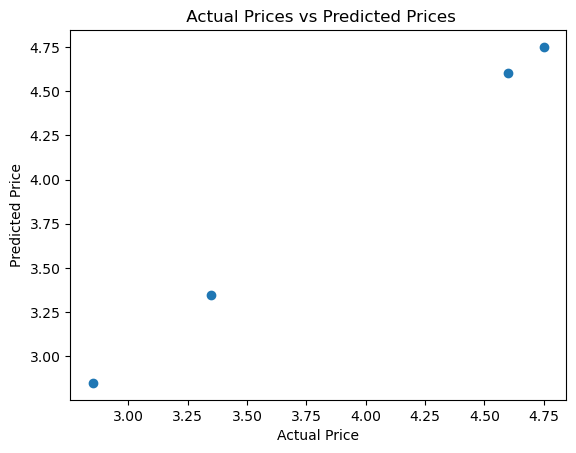

In [18]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [19]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [20]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  nan


c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


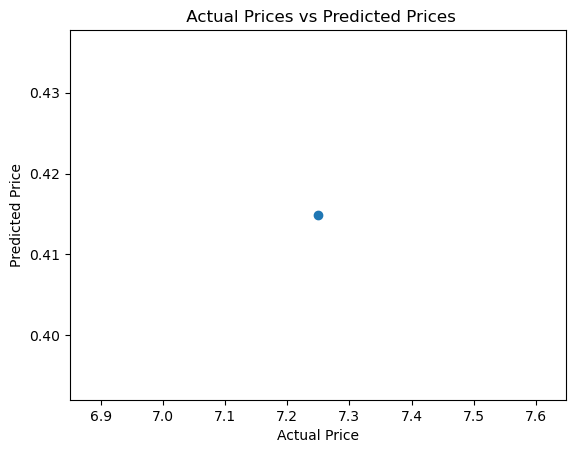

In [21]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [22]:
# loading the linear regression model
lass_reg_model = Lasso()

In [23]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [24]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [25]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9079214100958299


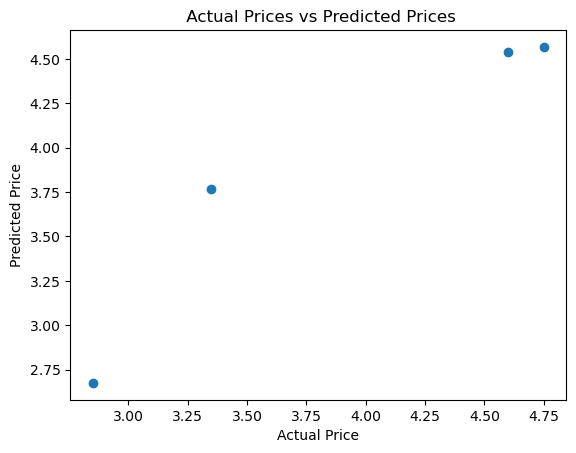

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  nan


c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


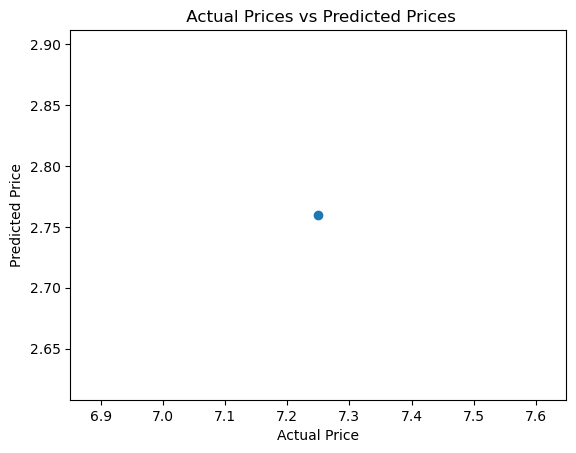

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()